In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

blue    = '#008fd5'
red     = '#fc4f30'
yellow  = '#e5ae37'
green   = '#6d904f'
skye    = '#33D1FF'
dred    = 'r'
pink    = "#FF338A"
lgreen  = '#99FF33'

colors = [blue, green, red, yellow, skye, dred, lgreen, pink]

df = pd.read_csv("cleaned_glassdoor_jobs.csv")

In [2]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,spark,aws,gcp,azure,java,tableau,powerbi,excel,job_spec,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,0,0,1,1,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,1,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,0,0,0,0,0,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,0,0,0,0,1,data scientist,na


In [6]:
df_col = df[['Location', 'Headquarters', 'Company Name', 'Size', 'job_state','Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_spec', 'seniority']]

Graph for Location: 25


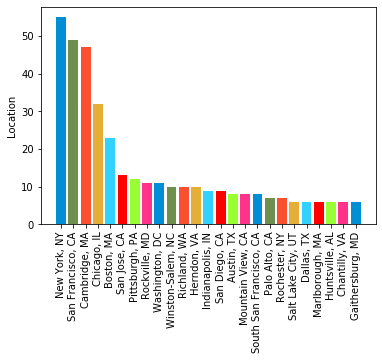

Graph for Headquarters: 25


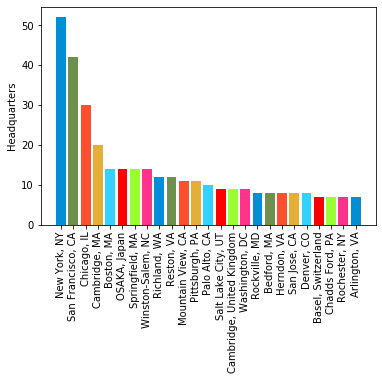

Graph for Company Name: 25


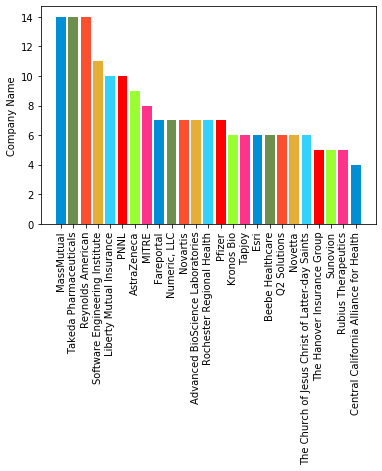

Graph for Size: 9


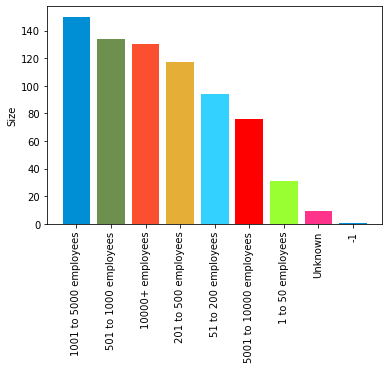

Graph for job_state: 25


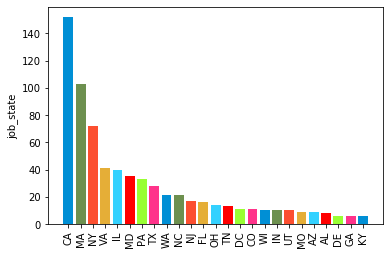

Graph for Type of ownership: 11


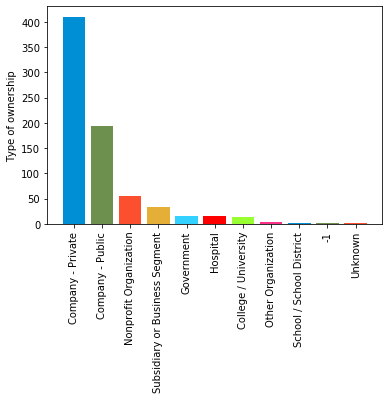

Graph for Industry: 25


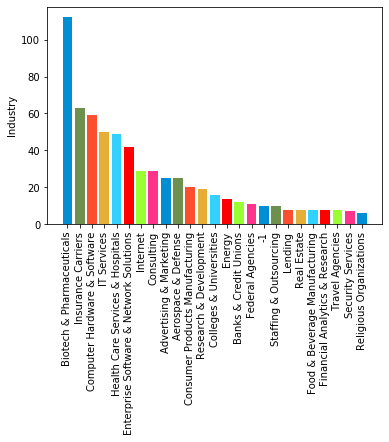

Graph for Sector: 25


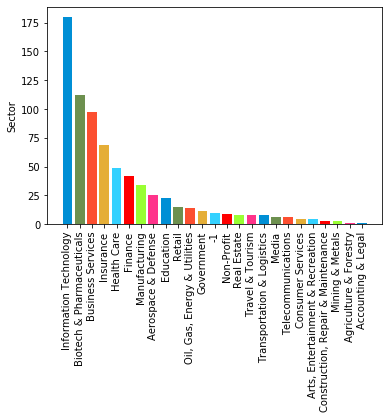

Graph for Revenue: 14


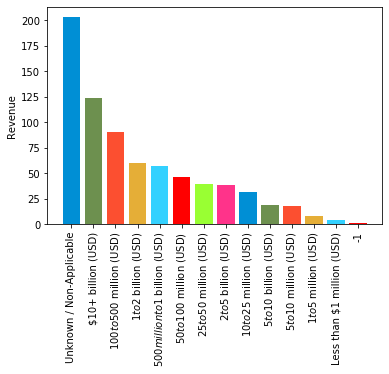

Graph for job_spec: 7


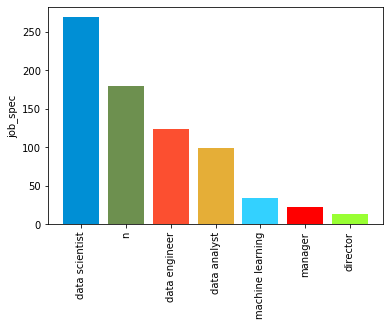

Graph for seniority: 3


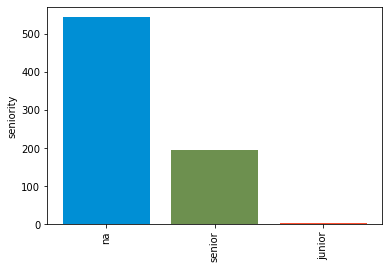

In [7]:


for i in df_col.columns:
    val = df[i].value_counts()
    if len(val) >=25:
        val = df[i].value_counts()[:25]

    print(f"Graph for {i}: {len(val)}")
    plt.bar(val.index, val,  color=colors)
    plt.xticks(rotation=90)
    plt.ylabel(i)
    plt.show()

In [19]:
pd.pivot_table(df, index=["job_spec", 'seniority'], values=["avg_salary"])

avg_salary
job_spec         seniority            
data analyst     junior      53.250000
                 na          60.964789
                 senior      75.480769
data engineer    na          96.357955
                 senior     123.638889
data scientist   junior     106.500000
                 na         110.968254
                 senior     136.069620
director         na         168.607143
machine learning na         110.380000
                 senior     115.944444
manager          na          84.022727
n                na          77.581481
                 senior     111.600000

In [17]:
pd.pivot_table(df, index=["job_state"], values=["avg_salary"]).sort_values("avg_salary", ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [26]:
pd.pivot_table(df, index = 'Revenue', columns = 'sql', values = 'avg_salary')

sql,0,1
Revenue,,
$1 to $2 billion (USD),104.583333,104.483333
$1 to $5 million (USD),118.750000,121.000000
$10 to $25 million (USD),83.950000,107.818182
$10+ billion (USD),111.707792,120.829787
$100 to $500 million (USD),78.581081,86.287037
$2 to $5 billion (USD),84.892857,100.240000
$25 to $50 million (USD),83.952381,81.605263
$5 to $10 billion (USD),47.500000,96.777778
$5 to $10 million (USD),138.000000,107.428571


In [28]:
!pip install wordcloud

  Using cached wordcloud-1.7.0.tar.gz (216 kB)
Using legacy setup.py install for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
    ERROR: Command errored out with exit status 1:
     command: 'c:\users\user\appdata\local\programs\python\python38-32\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-k1_i80ok\\wordcloud\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-k1_i80ok\\wordcloud\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\user\AppData\Local\Temp\pip-record-1n9vhee5\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\user\appdata\local\programs\python\p

In [27]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()